<a href="https://colab.research.google.com/github/Bhavani-Rajan/DS-Unit-2-Regression-Classification/blob/master/module4/assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4


## Assignment

- [ ] Watch Aaron's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

---


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding. For example, you could try `quantity`, `basin`, `extraction_type_class`, and more. (But remember it may not work with high cardinality categoricals.)
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

---

## Data Dictionary 

### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

--- 

## Generate a submission

Your code to generate a submission file may look like this:

```python
# estimator is your model or pipeline, which you've fit on X_train

# X_test is your pandas dataframe or numpy array, 
# with the same number of rows, in the same order, as test_features.csv, 
# and the same number of columns, in the same order, as X_train

y_pred = estimator.predict(X_test)


# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
```

If you're working locally, the csv file is saved in the same directory as your notebook.

If you're using Google Colab, you can use this code to download your submission csv file.

```python
from google.colab import files
files.download('your-submission-filename.csv')
```

---

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module4')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 19.30 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (71/71), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 3.4MB/s 
     |████████████████████████████████| 112kB 8.9MB/s 
     |████████████████████████████████| 133kB 53.7MB/s 
     |████████████████████████████████| 57.7MB 475kB/s 
     |████████████████████████████████| 235kB 44.6MB/s 
     |████████████████████████████████| 614kB 27.5MB/s 
     |████████████████████████████████| 235kB 42.0MB/s 
     |████████████████████████████████| 307kB 42.7MB/s 
     |████████████████████████████████| 51kB 20.2MB/s 
     |████████████████████████████████| 215kB 42.6MB/s 
     |██████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read the Tanzania Waterpumps data
# train_features.csv : the training set features
# train_labels.csv : the training set labels
# test_features.csv : the test set features
# sample_submission.csv : a sample submission file in the correct format
    
import pandas as pd

train_features = pd.read_csv('../data/waterpumps/train_features.csv')
train_labels = pd.read_csv('../data/waterpumps/train_labels.csv')
test_features = pd.read_csv('../data/waterpumps/test_features.csv')
sample_submission = pd.read_csv('../data/waterpumps/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [4]:
train_features.shape, test_features.shape

((59400, 40), (14358, 40))

#### Do train/validate/test split with the Tanzania Waterpumps data.

In [5]:
train_features.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [6]:
train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val = train_test_split(train_features,train_labels,random_state = 42)

In [8]:
X_train.shape, X_val.shape

((44550, 40), (14850, 40))

In [9]:
y_train.shape, y_val.shape

((44550, 2), (14850, 2))

In [10]:
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
24947,33935,20.0,2011-03-08,Government Of Tanzania,330,Ce,38.123839,-6.087137e+00,Ccm,0,Wami / Ruvu,Kilangawageni,Pwani,6,1,Bagamoyo,Mbwewe,80,True,GeoData Consultants Ltd,VWC,Kwaruhombo wa,True,1972,ksb,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
22630,49654,0.0,2013-02-16,Dwsp,0,DWE,0.000000,-2.000000e-08,Mwamahonza,0,Lake Victoria,Mwamahala,Mwanza,17,1,Magu,Nkungulu,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
13789,39287,0.0,2011-08-13,Dasip,0,DASIP,33.312321,-2.814100e+00,Chanongu,0,Lake Victoria,Chanongu,Mwanza,19,4,Kwimba,Wala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
15697,60510,0.0,2013-01-20,Government Of Tanzania,1542,GOVERNMENT,34.783049,-4.842093e+00,Zahanati,0,Internal,Mungumaji,Singida,13,4,Singida Urban,Mungumaji,23,True,GeoData Consultants Ltd,WUA,NaN,True,2010,gravity,gravity,gravity,wua,user-group,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
22613,24259,0.0,2013-09-03,World Bank,523,Government,34.660944,-1.070733e+01,Kwa Mzee Charles,0,Lake Nyasa,Tumba,Ruvuma,10,3,Mbinga,Mbaha,1,NaN,GeoData Consultants Ltd,VWC,Government,True,2013,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe


In [11]:
y_train.head()

,id,status_group
24947,33935,non functional
22630,49654,functional
13789,39287,functional
15697,60510,functional
22613,24259,non functional


In [12]:
train_features.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [0]:
# population
# extraction_type              
# extraction_type_group        
# extraction_type_class     
# water_quality 

In [13]:
train_labels.isnull().sum()

id              0
status_group    0
dtype: int64

In [14]:
X_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,44550.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000
mean,37087.547744,326.361114,668.105926,34.098625,-5.707581e+00,0.515376,15.366846,5.651291,178.793333,1303.746083
std,21436.367755,3291.640548,693.033591,6.530153,2.941883e+00,13.633690,17.696176,9.690341,471.050949,950.647840
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18555.250000,0.000000,0.000000,33.087274,-8.529283e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36992.500000,0.000000,369.000000,34.914362,-5.022018e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55631.500000,20.000000,1320.000000,37.181498,-3.327652e+00,0.000000,17.000000,5.000000,211.750000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [15]:
y_train.describe(exclude='number')

,status_group
count,44550
unique,3
top,functional
freq,24161


### categorical encoding for my_train_labels


In [16]:
y_train.head()

,id,status_group
24947,33935,non functional
22630,49654,functional
13789,39287,functional
15697,60510,functional
22613,24259,non functional


In [17]:
y_val.head()

,id,status_group
2980,37098,non functional
5246,14530,functional
22659,62607,functional
39888,46053,non functional
13361,47083,functional


#### Begin with baselines for classification.

In [18]:
y_train.describe()

,id
count,44550.000000
mean,37087.547744
std,21436.367755
min,0.000000
25%,18555.250000
50%,36992.500000
75%,55631.500000
max,74247.000000


In [19]:
# regression metrics

pd.value_counts(y_train['status_group'], normalize = True)


functional                 0.542334
non functional             0.384871
functional needs repair    0.072795
Name: status_group, dtype: float64

In [20]:
y_pred = ['functional'] * len(y_train)
y_pred = pd.DataFrame(data = y_pred,
                      index = y_train.index.values,
                      columns = ['status_group'])
y_pred.head()

,status_group
24947,functional
22630,functional
13789,functional
15697,functional
22613,functional


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train['status_group'], y_pred['status_group'])

0.542334455667789

In [22]:
y_val.describe(exclude='number')

,status_group
count,14850
unique,3
top,functional
freq,8098


In [23]:
y_val.head()

,id,status_group
2980,37098,non functional
5246,14530,functional
22659,62607,functional
39888,46053,non functional
13361,47083,functional


In [24]:
len(y_val)

14850

In [25]:


y_val_pred = ['functional'] * len(y_val)
y_val_pred = pd.DataFrame(data = y_val_pred,
                      index = y_val.index.values,
                      columns = ['status_group'])
accuracy_score(y_val['status_group'],y_val_pred['status_group'])


0.5453198653198653

### Use scikit-learn for logistic regression.

In [26]:
X_train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [46]:
X_train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,44550.0,37087.547744,21436.367755,0.00000,18555.250000,36992.500000,55631.500000,7.424700e+04
amount_tsh,44550.0,326.361114,3291.640548,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,44550.0,668.105926,693.033591,-63.00000,0.000000,369.000000,1320.000000,2.770000e+03
longitude,44550.0,34.098625,6.530153,0.00000,33.087274,34.914362,37.181498,4.034519e+01
latitude,44550.0,-5.707581,2.941883,-11.64944,-8.529283,-5.022018,-3.327652,-2.000000e-08
num_private,44550.0,0.515376,13.633690,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,44550.0,15.366846,17.696176,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,44550.0,5.651291,9.690341,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,44550.0,178.793333,471.050949,0.00000,0.000000,25.000000,211.750000,3.050000e+04
construction_year,44550.0,1303.746083,950.647840,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [47]:
X_train.describe(exclude='number').T

,count,unique,top,freq
date_recorded,44550,349,2011-03-15,443
funder,41859,1644,Government Of Tanzania,6777
installer,41850,1860,DWE,13081
wpt_name,44550,29076,none,2688
basin,44550,9,Lake Victoria,7663
subvillage,44268,16671,Shuleni,384
region,44550,21,Iringa,3991
lga,44550,125,Njombe,1877
ward,44550,2071,Igosi,230
public_meeting,42025,2,True,38180


In [95]:
import pandas as pd
import plotly.express as px

merged = pd.merge(X_train,y_train)
px.scatter(merged, y='source_class', x='status_group')

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer

# 3. Arrange X feature matrices (already did y target vectors)
features = ['quantity',
            'management_group',
            'extraction_type_class',
            'source_class'
            ]        
X_train_features = X_train[features]
X_val_features = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_features)
X_val_encoded = encoder.transform(X_val_features)

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [162]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', multi_class='auto')
log_reg.fit(X_train_imputed, y_train['status_group'])
print('Validation Accuracy', log_reg.score(X_val_imputed, y_val['status_group']))

Validation Accuracy 0.6883501683501684


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



In [137]:
# The predictions look like this
log_reg.predict(X_val_imputed)

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [138]:
log_reg.predict_proba(X_val_imputed)

array([[0.0040897 , 0.00125041, 0.99465988],
       [0.59919492, 0.08036338, 0.3204417 ],
       [0.59269718, 0.1057359 , 0.30156692],
       ...,
       [0.70900397, 0.07933859, 0.21165744],
       [0.7153589 , 0.06018112, 0.22445998],
       [0.03806656, 0.01459491, 0.94733853]])

#### Get your validation accuracy score.

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

target = 'status_group'
features = ['quantity',
            'management_group',
            'extraction_type_class',
            'source_class'
            ]

# features = ['quantity',
#             'extraction_type_class',
#             'source_class'
#            ]  

X_train_features = X_train[features]
y_train_target = y_train[target]
X_val_features = X_val[features]
y_val_target = y_val[target]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_features)
X_val_encoded = encoder.transform(X_val_features)

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [160]:
model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model.fit(X_train_scaled, y_train_target)
model.score(X_val_scaled, y_val_target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.6892255892255892

### plot coeff

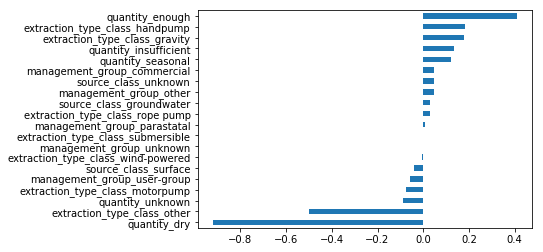

In [163]:
%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

### Generate Kaggle submission:

In [164]:
X_test = test_features[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

print(y_pred)

['non functional' 'functional' 'non functional' ... 'functional'
 'functional' 'non functional']


In [165]:
submission = test_features[['id']].copy()
submission['status_group'] = y_pred
submission.describe(exclude='number')


,status_group
count,14358
unique,2
top,functional
freq,11311


In [0]:
submission.to_csv('ds8-predictive-modeling-challenge-submission.csv', index=False)